In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from cmocean import cm
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stat

In [2]:
def calc_stats(x, y):
    stats = {}
    MSE = np.mean((y - x)**2)
    stats['RMSE'] = np.sqrt(MSE)
    stats['bias'] = np.mean(y) - np.mean(x)
    stats['WSS'] = 1 - MSE / np.mean((abs(y - np.mean(x)) + abs(x - np.mean(x)))**2)
    
    return stats


def plot_panel(ax, x, y, lims, units):
    stats = calc_stats(x, y)

    statstext = f"RMSE = {stats['RMSE']:.3f} {units}\nbias = {stats['bias']:.3f} {units}\nWSS = {stats['WSS']:.3f}"
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.9)
    c = ax.text(0.01, 0.8, statstext, bbox=props, transform=ax.transAxes, fontsize=9)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    return c

In [3]:
dfo_ctd2011 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20110101_20111231.csv')
dfo_ctd2012 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20120101_20121231.csv')
dfo_ctd2013 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20130101_20131231.csv')
dfo_ctd2014 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20140101_20141231.csv')
dfo_ctd2015 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20150101_20151231.csv')
dfo_ctd2016 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20160101_20161231.csv')
dfo_ctd2017 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20170101_20171231.csv')
dfo_ctd2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20180101_20181231.csv')
dfo_ctd2019 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20190101_20191231.csv')


In [4]:

bot2011 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2012 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2013 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2014 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2015 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2016 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2017 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2018 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2019 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')
bot2019 = pd.read_csv('/data/sallen/results/MEOPAR/202111/ObsModel/ObsModel_202111_bot_20110101_20111231.csv')

In [5]:
ncei_bot2011 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20110101_20111231.csv')
ncei_bot2012 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20120101_20121231.csv')
ncei_bot2013 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20130101_20131231.csv')
ncei_bot2014 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20140101_20141231.csv')
ncei_bot2015 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20150101_20151231.csv')
ncei_bot2016 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20160101_20161231.csv')
ncei_bot2017 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20170101_20171231.csv')
ncei_bot2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20180101_20181231.csv')

In [6]:
bot = pd.concat([bot2011, bot2012, bot2013, bot2014, bot2015, bot2016, bot2017, bot2018, bot2019], ignore_index=True)
#obs.name = 'bottle'
dfo_ctd = pd.concat([dfo_ctd2011, dfo_ctd2012, dfo_ctd2013, dfo_ctd2014, dfo_ctd2015, dfo_ctd2016, dfo_ctd2017, dfo_ctd2018, dfo_ctd2019], ignore_index=True)
ncei_bot = pd.concat([ncei_bot2011, ncei_bot2012, ncei_bot2013, ncei_bot2014, ncei_bot2015, ncei_bot2016, ncei_bot2017, ncei_bot2018], ignore_index=True)

#dfo_ctd
ncei_bot.head()

,Unnamed: 0,cid,cruise,dtUTC,Lat,Lon,name,Z,CT,SA,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
0,0,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,2.467178,12.281575,29.887370,...,244,19.653404,41.027050,1.975080,0.588942,0.193720,29.252359,12.293814,219.084015,2
1,1,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,4.983907,12.231575,29.904359,...,244,20.303905,41.439339,1.936729,0.535777,0.193011,29.506512,12.156579,208.136368,4
2,2,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,4.985890,12.278282,29.885267,...,244,20.303905,41.439339,1.936729,0.535777,0.193011,29.506512,12.156579,208.136368,4
3,3,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,4.985890,12.275240,29.886272,...,244,20.303905,41.439339,1.936729,0.535777,0.193011,29.506512,12.156579,208.136368,4
4,4,2.0,TN270,2011-10-08 19:56:56,47.7035,-122.4532,28,4.986881,12.274192,29.888282,...,244,20.303905,41.439339,1.936729,0.535777,0.193011,29.506512,12.156579,208.136368,4


In [7]:
grid = xr.open_dataset('/ocean/atall/MOAD/grid/grid_from_lat_lon_mask999.nc')
with xr.open_dataset('/data/atall/MEOPAR/grid/mesh_mask202108.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy
    long = mesh.nav_lon
    latg = mesh.nav_lat
mesh

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  07/08/2021 17:25:49 -0700

In [8]:
Saanich_Inlet = [330, 390, 180, 220]   # (jj_bot, jj_top, ii_left, ii_right) = (j1, j2, i1, i2)

latSI1 = np.array(latg.sel(x=180, y=330))
lonSI1 = np.array(long.sel(x=180, y=330))
latSI2 = np.array(latg.sel(x=180, y=390))
lonSI2 = np.array(long.sel(x=220, y=330))

print(lonSI1, lonSI2, latSI1, latSI2)

-123.5617 -123.35357 48.50578 48.743015


In [9]:
Hood_Canal = [70, 165, 85, 170]

latHC1 = np.array(latg.sel(x=85, y=70))
lonHC1 = np.array(long.sel(x=85, y=70))
latHC2 = np.array(latg.sel(x=85, y=165))
lonHC2 = np.array(long.sel(x=170, y=70))

print(lonHC1, lonHC2, latHC1, latHC2)

-123.20103 -122.75411 47.292076 47.666256


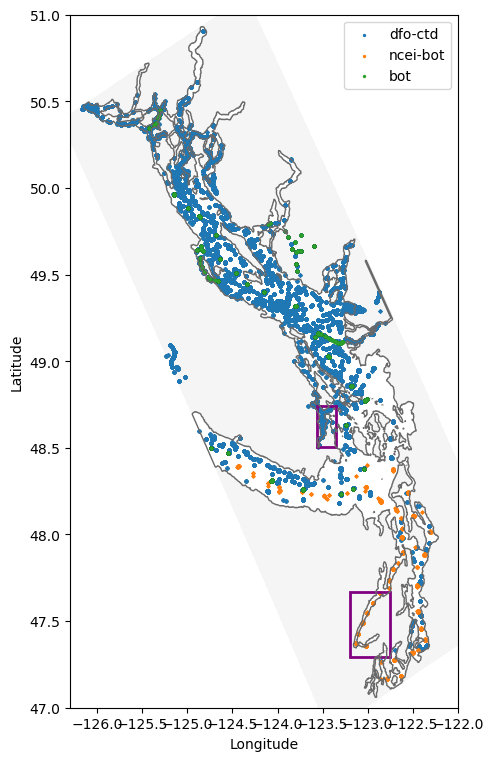

In [10]:
fig, ax = plt.subplots(1,1,figsize=(5, 9))

ax.contourf(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
#ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([47,51])
ax.set_xlim([-126.3,-122])

# plot the location of observations
ax.scatter(dfo_ctd.Lon[dfo_ctd.name != 'bottle'], dfo_ctd.Lat[dfo_ctd.name != 'bottle'], s=2, label="dfo-ctd")
ax.scatter(ncei_bot.Lon[ncei_bot.name != 'ctd'], ncei_bot.Lat[ncei_bot.name != 'ctd'], s=2, label="ncei-bot")
ax.scatter(bot.Lon, bot.Lat, s=2, label="bot")
ax.legend()
#ax.plot([lonSI1, lonSI2, lonSI2, lonSI1, lonSI1], [latSI1, latSI1, latSI2, latSI2, latSI1], '-','r')
leftSI, bottomSI, widthSI, heightSI = (lonSI1, latSI1, lonSI2-lonSI1, latSI2-latSI1)
leftHC, bottomHC, widthHC, heightHC = (lonHC1, latHC1, lonHC2-lonHC1, latHC2-latHC1)
rectSI=mpatches.Rectangle((leftSI,bottomSI),widthSI,heightSI, 
                        fill=False,
                        #alpha=0.1
                        color="purple",
                       linewidth=2,
                       label="Saanich Inlet")
rectHC=mpatches.Rectangle((leftHC,bottomHC),widthHC,heightHC, 
                        fill=False,
                        #alpha=0.1
                        color="purple",
                       linewidth=2,
                       label="Saanich Inlet")
                       #facecolor="red")
plt.gca().add_patch(rectSI)
plt.gca().add_patch(rectHC)

In [11]:
#dfo_ctd_SI = dfo_ctd.sel(dfo_ctd.Lon>=lonSI1 & dfo_ctd.Lon<=lonSI2 & dfo_ctd.Lat>=latSI1 & dfo_ctd.Lat<=latSI2)
df_SI = dfo_ctd[ dfo_ctd['Lon'].between(lonSI1, lonSI2) & dfo_ctd['Lat'].between(latSI1, latSI2) ]
df_HC_ncei = ncei_bot[ ncei_bot['Lon'].between(lonHC1, lonHC2) & ncei_bot['Lat'].between(latHC1, latHC2) ]
df_SI_bot = bot[ bot['Lon'].between(lonSI1, lonSI2) & bot['Lat'].between(latSI1, latSI2) ]
#df_SI.head()
df_HC_ncei.head()
#df_SI_bot.head()

,Unnamed: 0,cid,cruise,dtUTC,Lat,Lon,name,Z,CT,SA,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
293,293,25.0,TN270,2011-10-12 08:24:11,47.6618,-122.859,15,3.016549,10.754945,28.040458,...,180,25.357296,50.823460,1.792874,0.449702,0.264420,28.966175,10.595083,163.910614,3
294,294,25.0,TN270,2011-10-12 08:24:11,47.6618,-122.859,15,5.160433,10.602763,28.684473,...,180,25.901150,51.487450,1.758018,0.391266,0.269927,29.105593,10.474861,150.142303,5
295,295,25.0,TN270,2011-10-12 08:24:11,47.6618,-122.859,15,10.429811,10.278686,29.468051,...,180,26.861689,52.132000,1.695129,0.180299,0.265946,29.522961,10.281540,128.460846,10
296,296,25.0,TN270,2011-10-12 08:24:11,47.6618,-122.859,15,20.232436,9.827349,29.996381,...,180,27.234522,52.709942,1.642040,0.057783,0.187237,29.811108,10.311057,121.031708,18
297,297,25.0,TN270,2011-10-12 08:24:11,47.6618,-122.859,15,30.312209,10.440342,30.204961,...,180,26.685623,51.803543,1.665381,0.037670,0.134014,29.898544,10.485911,125.061241,21


In [12]:
def profilesSI(tracer,colour,ax):
    if tracer == 'Salinity':
        t_obs = 'SA'
        t_mod = 'mod_vosaline'
        unit = 'g/kg'
    elif tracer == 'Temperature':
        t_obs = 'CT'
        t_mod = 'mod_votemper'
        unit = '$^{\circ} C$'
    elif tracer == 'DO':
        t_obs = 'Oxygen_Dissolved'
        t_mod = 'mod_dissolved_oxygen'
        unit = 'uM'
    elif tracer == 'NO3':
        t_obs = 'N'
        t_mod = 'mod_nitrate'
        unit = 'uM'

    avg_obs_SI, bins, _ = stat.binned_statistic(-df_SI['Z'][(np.isfinite(df_SI[t_obs]))],df_SI[t_obs][(np.isfinite(df_SI[t_obs]))],statistic='mean',bins=100)
    avg_mod_SI, bins, _ = stat.binned_statistic(-df_SI['Z'][(np.isfinite(df_SI[t_mod]))],df_SI[t_mod][(np.isfinite(df_SI[t_mod]))],statistic='mean',bins=100)

    ax.plot(avg_mod_SI, bins[:-1], c=colour,lw=2,ls='dashed',label='mod')
    ax.plot(avg_obs_SI, bins[:-1],c=colour,lw=2,label='obs')

    title = tracer
    #ax.set_title(title)
    ax.set_xlabel(unit)
    #ax.set_yticks([])

def profilesHC(tracer,colour,ax):
    if tracer == 'Salinity':
        t_obs = 'SA'
        t_mod = 'mod_vosaline'
        unit = 'g/kg'
    elif tracer == 'Temperature':
        t_obs = 'CT'
        t_mod = 'mod_votemper'
        unit = '$^{\circ} C$'
    elif tracer == 'DO':
        t_obs = 'Oxygen_Dissolved'
        t_mod = 'mod_dissolved_oxygen'
        unit = 'uM'
    elif tracer == 'NO3':
        t_obs = 'N'
        t_mod = 'mod_nitrate'
        unit = 'uM'

    avg_obs_HC, bins, _ = stat.binned_statistic(-df_HC_ncei['Z'][(np.isfinite(df_HC_ncei[t_obs]))],df_HC_ncei[t_obs][(np.isfinite(df_HC_ncei[t_obs]))],statistic='mean',bins=15)
    avg_mod_HC, bins, _ = stat.binned_statistic(-df_HC_ncei['Z'][(np.isfinite(df_HC_ncei[t_mod]))],df_HC_ncei[t_mod][(np.isfinite(df_HC_ncei[t_mod]))],statistic='mean',bins=15)


    ax.plot(avg_mod_HC, bins[:-1], c=colour,lw=2,ls='dashed',label='mod')
    ax.plot(avg_obs_HC, bins[:-1],c=colour,lw=2,label='obs')

    title = tracer
    #ax.set_title(title)
    ax.set_xlabel(unit)
    #ax.set_yticks([])

In [13]:
def prop_prop(ax,stringX,stringY,x,y,binX,binY):
    cmap = cm.rain
    cmap.set_bad('w')
    # cmap.set_extremes(under='w')

    bins = [binX,binY]
    H, xedges, yedges=np.histogram2d(x,y,bins=bins)
    H = H.T
    H_final = np.where(H>0, H, H*np.nan)
    X, Y = np.meshgrid(xedges, yedges)
    im = ax.pcolormesh(X, Y, H_final, cmap=cmap)#, norm=LogNorm(vmin=10, vmax=4500))
    ax.set_ylabel(stringY)
    ax.set_xlabel(stringX)

In [14]:
#set consistent bins
Tbin = np.linspace(5,20,50)
Sbin = np.linspace(20,33,50)
Dbin = np.linspace(0,500,50)
Nbin = np.linspace(0,40,50)

Evaluation of 201111 SalishSeaCast model version of DO, S T (2011-2019) in Saanich Inlet (SI):


Evaluation of 201111 SalishSeaCast model version of DO, NO3, S, T (2011-2018) in Hood Canal (HC):


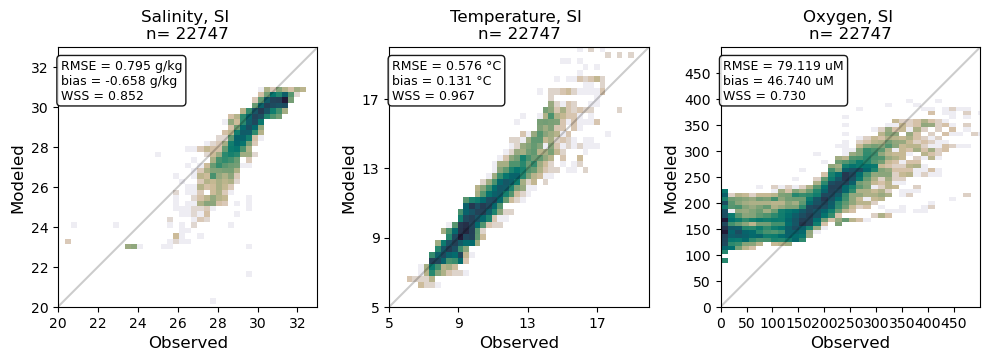

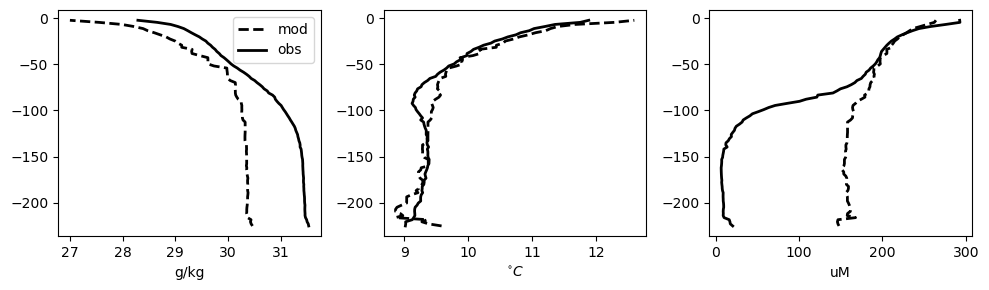

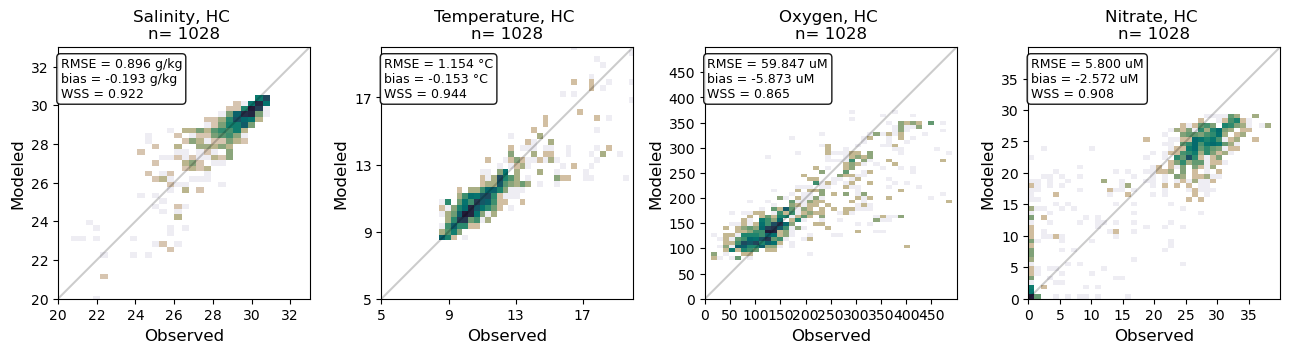

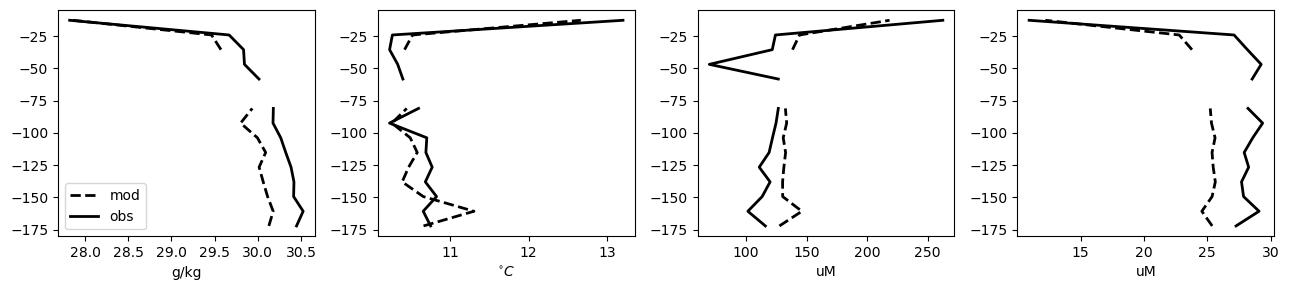

In [15]:
print("Evaluation of 201111 SalishSeaCast model version of DO, S T (2011-2019) in Saanich Inlet (SI):")

cmap = cm.rain

fig, axs = plt.subplots(1, 3, figsize = (10, 5)) 

i, j, k = (0, 1, 2)
axs[i].plot((20,33),(20,33),'k-',alpha=.2)
axs[j].plot((5,20),(5,20),'k-',alpha=.2)
axs[k].plot((0,500),(0,500),'k-',alpha=.2)

iiS=(~np.isnan(df_SI.SA))&(~np.isnan(df_SI.mod_vosaline))
iiT=(~np.isnan(df_SI.CT))&(~np.isnan(df_SI.mod_votemper))
iiO=(~np.isnan(df_SI.Oxygen_Dissolved))&(~np.isnan(df_SI.mod_dissolved_oxygen))

counts, xedges, yedges, m2=axs[i].hist2d(df_SI.loc[iiS,['SA']].values.flatten(),
                                        df_SI.loc[iiS,['mod_vosaline']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[j].hist2d(df_SI.loc[iiT,['CT']].values.flatten(),
                                        df_SI.loc[iiT,['mod_votemper']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[k].hist2d(df_SI.loc[iiO,['Oxygen_Dissolved']].values.flatten(),
                                        df_SI.loc[iiO,['mod_dissolved_oxygen']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

ntickS=np.arange(20, 33, 2)
ntickT=np.arange(5, 20, 4)
ntickO=np.arange(0, 500, 50)

axs[i].set_xlim((20,33))
axs[i].set_ylim((20,33))
axs[i].set_xticks(ntickS)
axs[i].set_yticks(ntickS)

axs[j].set_xlim((5,20))
axs[j].set_ylim((5,20))
axs[j].set_xticks(ntickT)
axs[j].set_yticks(ntickT)

axs[k].set_xlim((0,500))
axs[k].set_ylim((0,500))
axs[k].set_xticks(ntickO)
axs[k].set_yticks(ntickO)

axs[i].set_aspect(1, adjustable='box')
axs[i].set_ylabel('Modeled',fontsize=12)
axs[i].set_xlabel('Observed',fontsize=12)

axs[j].set_aspect(1, adjustable='box')
axs[j].set_ylabel('Modeled',fontsize=12)
axs[j].set_xlabel('Observed',fontsize=12)

axs[k].set_aspect(1, adjustable='box')
axs[k].set_ylabel('Modeled',fontsize=12)
axs[k].set_xlabel('Observed',fontsize=12)

title = 'Salinity, SI '+'\nn= '+str(len(df_SI))
axs[i].set_title(title,fontsize=12)

title = 'Temperature, SI '+'\nn= '+str(len(df_SI))
axs[j].set_title(title,fontsize=12)

title = 'Oxygen, SI '+'\nn= '+str(len(df_SI))
axs[k].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(axs[i], df_SI['SA'], df_SI['mod_vosaline'], (20,33), 'g/kg')
plot_panel(axs[j], df_SI['CT'], df_SI['mod_votemper'], (5,20), '°C')
plot_panel(axs[k], df_SI['Oxygen_Dissolved'], df_SI['mod_dissolved_oxygen'], (0,500), 'uM')
plt.tight_layout()

# plot profiles Saaanich Inlet
fig, ax = plt.subplots(1,3, figsize=(10,3))
profilesSI('Salinity','k',ax[0])
profilesSI('Temperature','k',ax[1])
profilesSI('DO','k',ax[2])
ax[0].legend()
plt.tight_layout()




######################### Hood Canal ###################################
print("Evaluation of 201111 SalishSeaCast model version of DO, NO3, S, T (2011-2018) in Hood Canal (HC):")
fig, axs = plt.subplots(1, 4, figsize = (13, 5)) 

i, j, k, l = (0, 1, 2, 3)
axs[i].plot((20,33),(20,33),'k-',alpha=.2)
axs[j].plot((5,20),(5,20),'k-',alpha=.2)
axs[k].plot((0,500),(0,500),'k-',alpha=.2)
axs[l].plot((0,40),(0,40),'k-',alpha=.2)

iiSHC=(~np.isnan(df_HC_ncei.SA))&(~np.isnan(df_HC_ncei.mod_vosaline))
iiTHC=(~np.isnan(df_HC_ncei.CT))&(~np.isnan(df_HC_ncei.mod_votemper))
iiOHC=(~np.isnan(df_HC_ncei.Oxygen_Dissolved))&(~np.isnan(df_HC_ncei.mod_dissolved_oxygen))
iiNHC=(~np.isnan(df_HC_ncei.N))&(~np.isnan(df_HC_ncei.mod_nitrate))

counts, xedges, yedges, m2=axs[i].hist2d(df_HC_ncei.loc[iiSHC,['SA']].values.flatten(),
                                        df_HC_ncei.loc[iiSHC,['mod_vosaline']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[j].hist2d(df_HC_ncei.loc[iiTHC,['CT']].values.flatten(),
                                        df_HC_ncei.loc[iiTHC,['mod_votemper']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[k].hist2d(df_HC_ncei.loc[iiOHC,['Oxygen_Dissolved']].values.flatten(),
                                        df_HC_ncei.loc[iiOHC,['mod_dissolved_oxygen']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)
counts, xedges, yedges, m2=axs[l].hist2d(df_HC_ncei.loc[iiNHC,['N']].values.flatten(),
                                        df_HC_ncei.loc[iiNHC,['mod_nitrate']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

ntickS=np.arange(20, 33, 2)
ntickT=np.arange(5, 20, 4)
ntickO=np.arange(0, 500, 50)
ntickN=np.arange(0, 40, 5)

axs[i].set_xlim((20,33))
axs[i].set_ylim((20,33))
axs[i].set_xticks(ntickS)
axs[i].set_yticks(ntickS)

axs[j].set_xlim((5,20))
axs[j].set_ylim((5,20))
axs[j].set_xticks(ntickT)
axs[j].set_yticks(ntickT)

axs[k].set_xlim((0,500))
axs[k].set_ylim((0,500))
axs[k].set_xticks(ntickO)
axs[k].set_yticks(ntickO)

axs[l].set_xlim((0,40))
axs[l].set_ylim((0,40))
axs[l].set_xticks(ntickN)
axs[l].set_yticks(ntickN)

axs[i].set_aspect(1, adjustable='box')
axs[i].set_ylabel('Modeled',fontsize=12)
axs[i].set_xlabel('Observed',fontsize=12)

axs[j].set_aspect(1, adjustable='box')
axs[j].set_ylabel('Modeled',fontsize=12)
axs[j].set_xlabel('Observed',fontsize=12)

axs[k].set_aspect(1, adjustable='box')
axs[k].set_ylabel('Modeled',fontsize=12)
axs[k].set_xlabel('Observed',fontsize=12)

axs[l].set_aspect(1, adjustable='box')
axs[l].set_ylabel('Modeled',fontsize=12)
axs[l].set_xlabel('Observed',fontsize=12)

title = 'Salinity, HC '+'\nn= '+str(len(df_HC_ncei))
axs[i].set_title(title,fontsize=12)

title = 'Temperature, HC '+'\nn= '+str(len(df_HC_ncei))
axs[j].set_title(title,fontsize=12)

title = 'Oxygen, HC '+'\nn= '+str(len(df_HC_ncei))
axs[k].set_title(title,fontsize=12)

title = 'Nitrate, HC '+'\nn= '+str(len(df_HC_ncei))
axs[l].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(axs[i], df_HC_ncei['SA'], df_HC_ncei['mod_vosaline'], (20,33), 'g/kg')
plot_panel(axs[j], df_HC_ncei['CT'], df_HC_ncei['mod_votemper'], (5,20), '°C')
plot_panel(axs[k], df_HC_ncei['Oxygen_Dissolved'], df_HC_ncei['mod_dissolved_oxygen'], (0,500), 'uM')
plot_panel(axs[l], df_HC_ncei['N'], df_HC_ncei['mod_nitrate'], (0,40), 'uM')
plt.tight_layout()

# plot profiles Hood Canal
fig, ax = plt.subplots(1,4, figsize=(13,3))
profilesHC('Salinity','k',ax[0])
profilesHC('Temperature','k',ax[1])
profilesHC('DO','k',ax[2])
profilesHC('NO3','k',ax[3])
ax[0].legend()
plt.tight_layout()


property of water masses in Saanich Inlet (2011-2019)


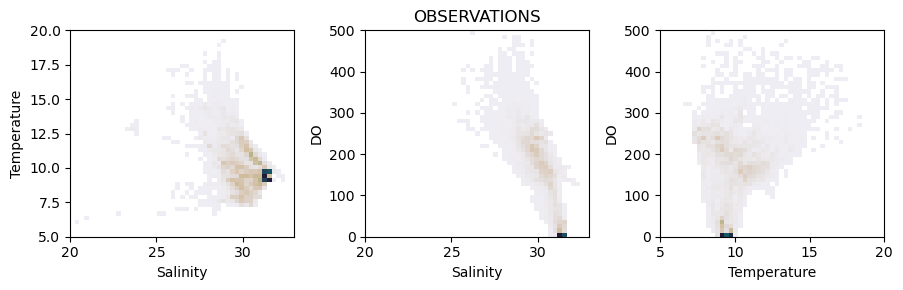

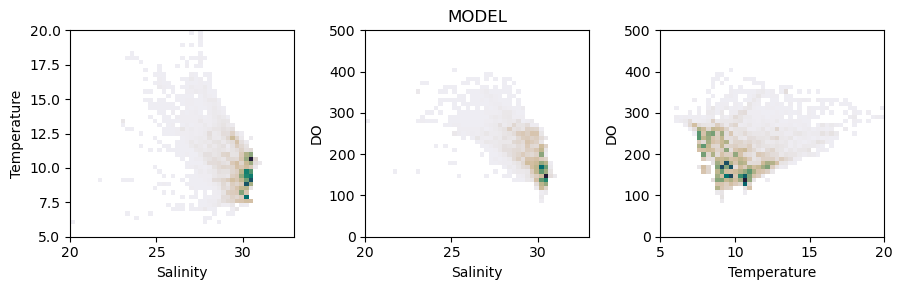

In [24]:
# obs versus model property property plots
print('property of water masses in Saanich Inlet (2011-2019)')
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",df_SI.SA,df_SI.CT,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",df_SI.SA,df_SI["Oxygen_Dissolved"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",df_SI.CT,df_SI["Oxygen_Dissolved"],Tbin,Dbin)
axs[1].set_title('OBSERVATIONS')
plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 
prop_prop(axs[0],"Salinity","Temperature",df_SI.mod_vosaline,df_SI.mod_votemper,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",df_SI.mod_vosaline,df_SI["mod_dissolved_oxygen"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",df_SI.mod_votemper,df_SI["mod_dissolved_oxygen"],Tbin,Dbin)
axs[1].set_title('MODEL')
plt.tight_layout()

property of water masses in Hood Canal (2011-2018)


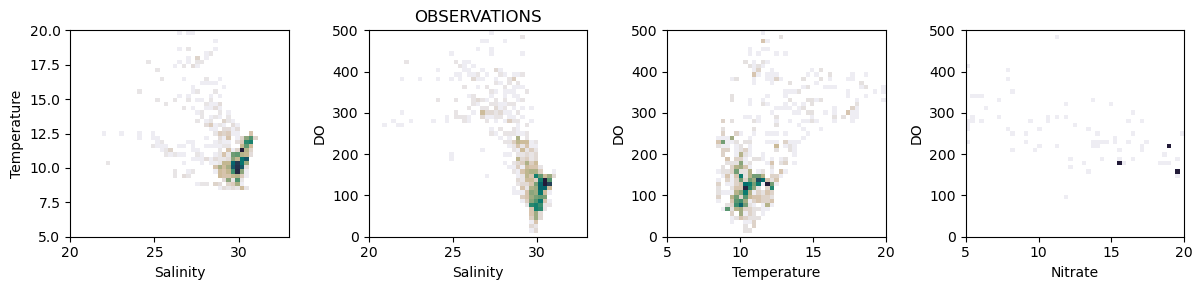

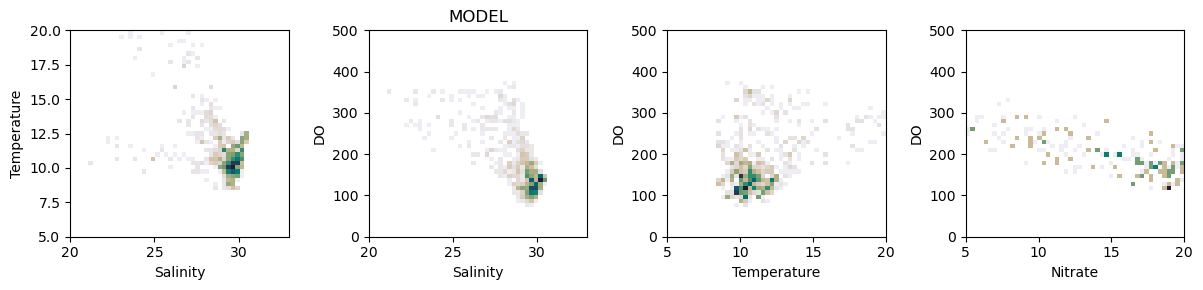

In [25]:
# obs versus model property property plots
print('property of water masses in Hood Canal (2011-2018)')
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",df_HC_ncei.SA,df_HC_ncei.CT,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",df_HC_ncei.SA,df_HC_ncei["Oxygen_Dissolved"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",df_HC_ncei.CT,df_HC_ncei["Oxygen_Dissolved"],Tbin,Dbin)
prop_prop(axs[3],"Nitrate","DO",df_HC_ncei.N,df_HC_ncei["Oxygen_Dissolved"],Tbin,Dbin)
axs[1].set_title('OBSERVATIONS')
plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 
prop_prop(axs[0],"Salinity","Temperature",df_HC_ncei.mod_vosaline,df_HC_ncei.mod_votemper,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",df_HC_ncei.mod_vosaline,df_HC_ncei["mod_dissolved_oxygen"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",df_HC_ncei.mod_votemper,df_HC_ncei["mod_dissolved_oxygen"],Tbin,Dbin)
prop_prop(axs[3],"Nitrate","DO",df_HC_ncei.mod_nitrate,df_HC_ncei["mod_dissolved_oxygen"],Tbin,Dbin)
axs[1].set_title('MODEL')
plt.tight_layout()